### Electromagnetics - objective function

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import pygimli as pg
from objfun import showPhiD

Wir berechnen die Zielfunktion für den Fall einer elektromagnetischen Frequenzsondierung mit einer Helikopter/RESOLVE Geometrie.

In [13]:
f = np.logspace(1, 5, 9)
print(f)

[1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]


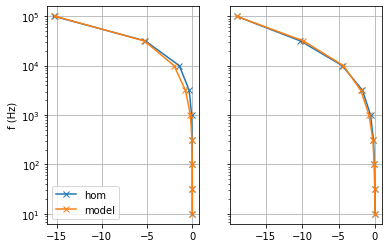

In [26]:
#fop = pg.core.FDEM1dModelling(3, f, 10., 50)  # helicopter
fop = pg.core.FDEM1dModelling(3, f, 10., 10)  # drone
# fop = pg.core.FDEM1dModelling(3, f, 100., 2)  # ground (Maxmin)
hom = [100, ] * 5
dataHom = fop.response(hom)
model = [30, 30, 100, 20, 100]  # d1, d2, r1, r2, r3
dataInh = fop.response(model)
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].semilogy(dataHom[:len(f)], f, "x-", color="C0", label="hom")
ax[1].semilogy(dataHom[len(f):], f, "x-", color="C0", label="hom")
ax[0].semilogy(dataInh[:len(f)], f, "x-", color="C1", label="model")
ax[1].semilogy(dataInh[len(f):], f, "x-", color="C1", label="model")
for a in ax:
    a.grid(True)
ax[0].legend()
ax[0].set_ylabel("f (Hz)");

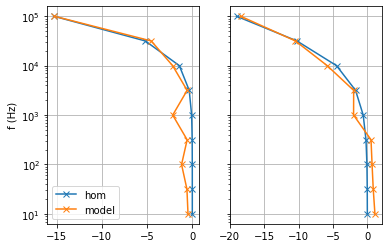

In [27]:
error = 1.0
dataInh += np.random.randn(len(dataInh)) * error
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].semilogy(dataHom[:len(f)], f, "x-", color="C0", label="hom")
ax[1].semilogy(dataHom[len(f):], f, "x-", color="C0", label="hom")
ax[0].semilogy(dataInh[:len(f)], f, "x-", color="C1", label="model")
ax[1].semilogy(dataInh[len(f):], f, "x-", color="C1", label="model")
for a in ax:
    a.grid(True)
ax[0].legend()
ax[0].set_ylabel("f (Hz)");

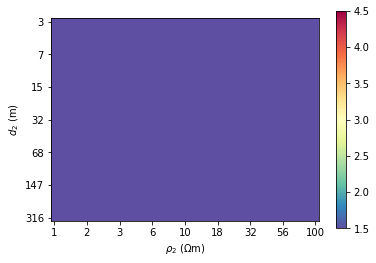

In [28]:
phiD = lambda x, y, err: np.sum((x-y)**2/err**2)
thk2 = np.logspace(0.5, 2.5, 31)
res2 = np.logspace(0, 2, 41)
M = np.zeros((len(thk2), len(res2)))
for i, model[1] in enumerate(thk2):
    for j, model[3] in enumerate(res2):
        M[i, j] = phiD(dataInh, fop.response(model), error)

showPhiD(res2, thk2, M);

In [6]:
it, ir = np.nonzero(M == np.min(M))
print(thk2[it], res2[ir])

[79.43282347] [100.]


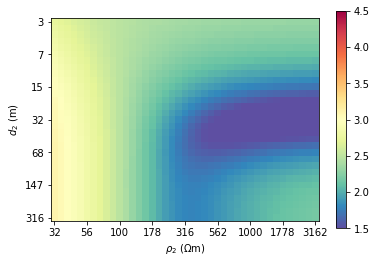

In [8]:
model = [30, 30, 100, 2000, 100]  # d1, d2, r1, r2, r3
dataInh = fop.response(model)
dataInh += np.random.randn(len(dataInh)) * error
thk2 = np.logspace(0.5, 2.5, 31)
res2 = np.logspace(1.5, 3.5, 41)
M = np.zeros((len(thk2), len(res2)))
for i, model[1] in enumerate(thk2):
    for j, model[3] in enumerate(res2):
        M[i, j] = phiD(dataInh, fop.response(model), error)

showPhiD(res2, thk2, M);